In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obesity_df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
obesity_df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
obesity_df.shape

(2111, 17)

In [5]:
obesity_df['BMI'] = obesity_df['Weight']/(obesity_df['Height'] ** 2)

In [6]:
obesity_df['Age'] = obesity_df['Age'].apply(lambda age : round(age)) 
obesity_df['Weight'] = obesity_df['Weight'].apply(lambda weight : round(weight)) 

In [7]:
obesity_df.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62      64                            yes   no   2.0  3.0   
1  Female   21    1.52      56                            yes   no   3.0  3.0   
2    Male   23    1.80      77                            yes   no   2.0  3.0   
3    Male   27    1.80      87                             no   no   3.0  3.0   
4    Male   22    1.78      90                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad        BMI  
0        Normal_Weight  24.386526  
1        Normal_Weight  24.238227  
2        Normal_Weight  23.765432  
3   Overweight_Level_I  26.851852  
4  Overweight_Level_II  28.342381

In [8]:
obesity_df.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [9]:
c = obesity_df.NObeyesdad.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [10]:
#Convert categorical columns into numeric columns
obesity_df['Gender'] = obesity_df['Gender'].astype('category').cat.codes
obesity_df['family_history_with_overweight'] = obesity_df['family_history_with_overweight'].astype('category').cat.codes
obesity_df['FAVC'] = obesity_df['FAVC'].astype('category').cat.codes
obesity_df['CAEC'] = obesity_df['CAEC'].astype('category').cat.codes
obesity_df['SMOKE'] = obesity_df['SMOKE'].astype('category').cat.codes
obesity_df['SCC'] = obesity_df['SCC'].astype('category').cat.codes
obesity_df['CALC'] = obesity_df['CALC'].astype('category').cat.codes
obesity_df['MTRANS'] = obesity_df['MTRANS'].astype('category').cat.codes
obesity_df['NObeyesdad'] = obesity_df['NObeyesdad'].astype('category').cat.codes


In [11]:
# Rounding age column values 
obesity_df['Age'] = obesity_df['Age'].apply(lambda age : round(age)) 

In [12]:
obesity_df.head()

Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62      64                               1     0   2.0   
1       0   21    1.52      56                               1     0   3.0   
2       1   23    1.80      77                               1     0   2.0   
3       1   27    1.80      87                               0     0   3.0   
4       1   22    1.78      90                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad        BMI  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  24.386526  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  24.238227  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  23.765432  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  26.851852  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  28.342381

In [13]:
obesity_df.describe()

Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.315964     1.701677    86.586452   
std       0.500083     6.357078     0.093305    26.190136   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    20.000000     1.630000    65.500000   
50%       1.000000    23.000000     1.700499    83.000000   
75%       1.000000    26.000000     1.768464   107.000000   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     2.419043     2.685628   
std                          0.386247     0.320371     0.533927     0.778039   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          1.000000     1.000000     2.000000     2.658738   
50%                          1.000000     1.000000     2.385502     3.000000   
75%                          1.000000     1.000000     3.000000     3.000000   
max                          1.000000     1.000000     3.000000     4.000000   

              CAEC        SMOKE         CH2O          SCC          FAF  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      1.859308     0.020843     2.008011     0.045476     1.010298   
std       0.468543     0.142893     0.612953     0.208395     0.850592   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       2.000000     0.000000     1.584812     0.000000     0.124505   
50%       2.000000     0.000000     2.000000     0.000000     1.000000   
75%       2.000000     0.000000     2.477420     0.000000     1.666678   
max       3.000000     1.000000     3.000000     1.000000     3.000000   

               TUE         CALC       MTRANS   NObeyesdad          BMI  
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000  
mean      0.657866     2.268593     2.365230     3.015632    29.700159  
std       0.608927     0.515498     1.261423     1.952090     8.011337  
min       0.000000     0.000000     0.000000     0.000000    12.998685  
25%       0.000000     2.000000     3.000000     1.000000    24.325802  
50%       0.625350     2.000000     3.000000     3.000000    28.719089  
75%       1.000000     3.000000     3.000000     5.000000    36.016501  
max       2.000000     3.000000     4.000000     6.000000    50.811753

## Data Preprocessing

- Data Cleaning: clean the data by filling missing values, smoothing the noisy data, resolving the inconsistency, and removing outliers
- Data Integration: 
- Data Transformation
- Data Reduction

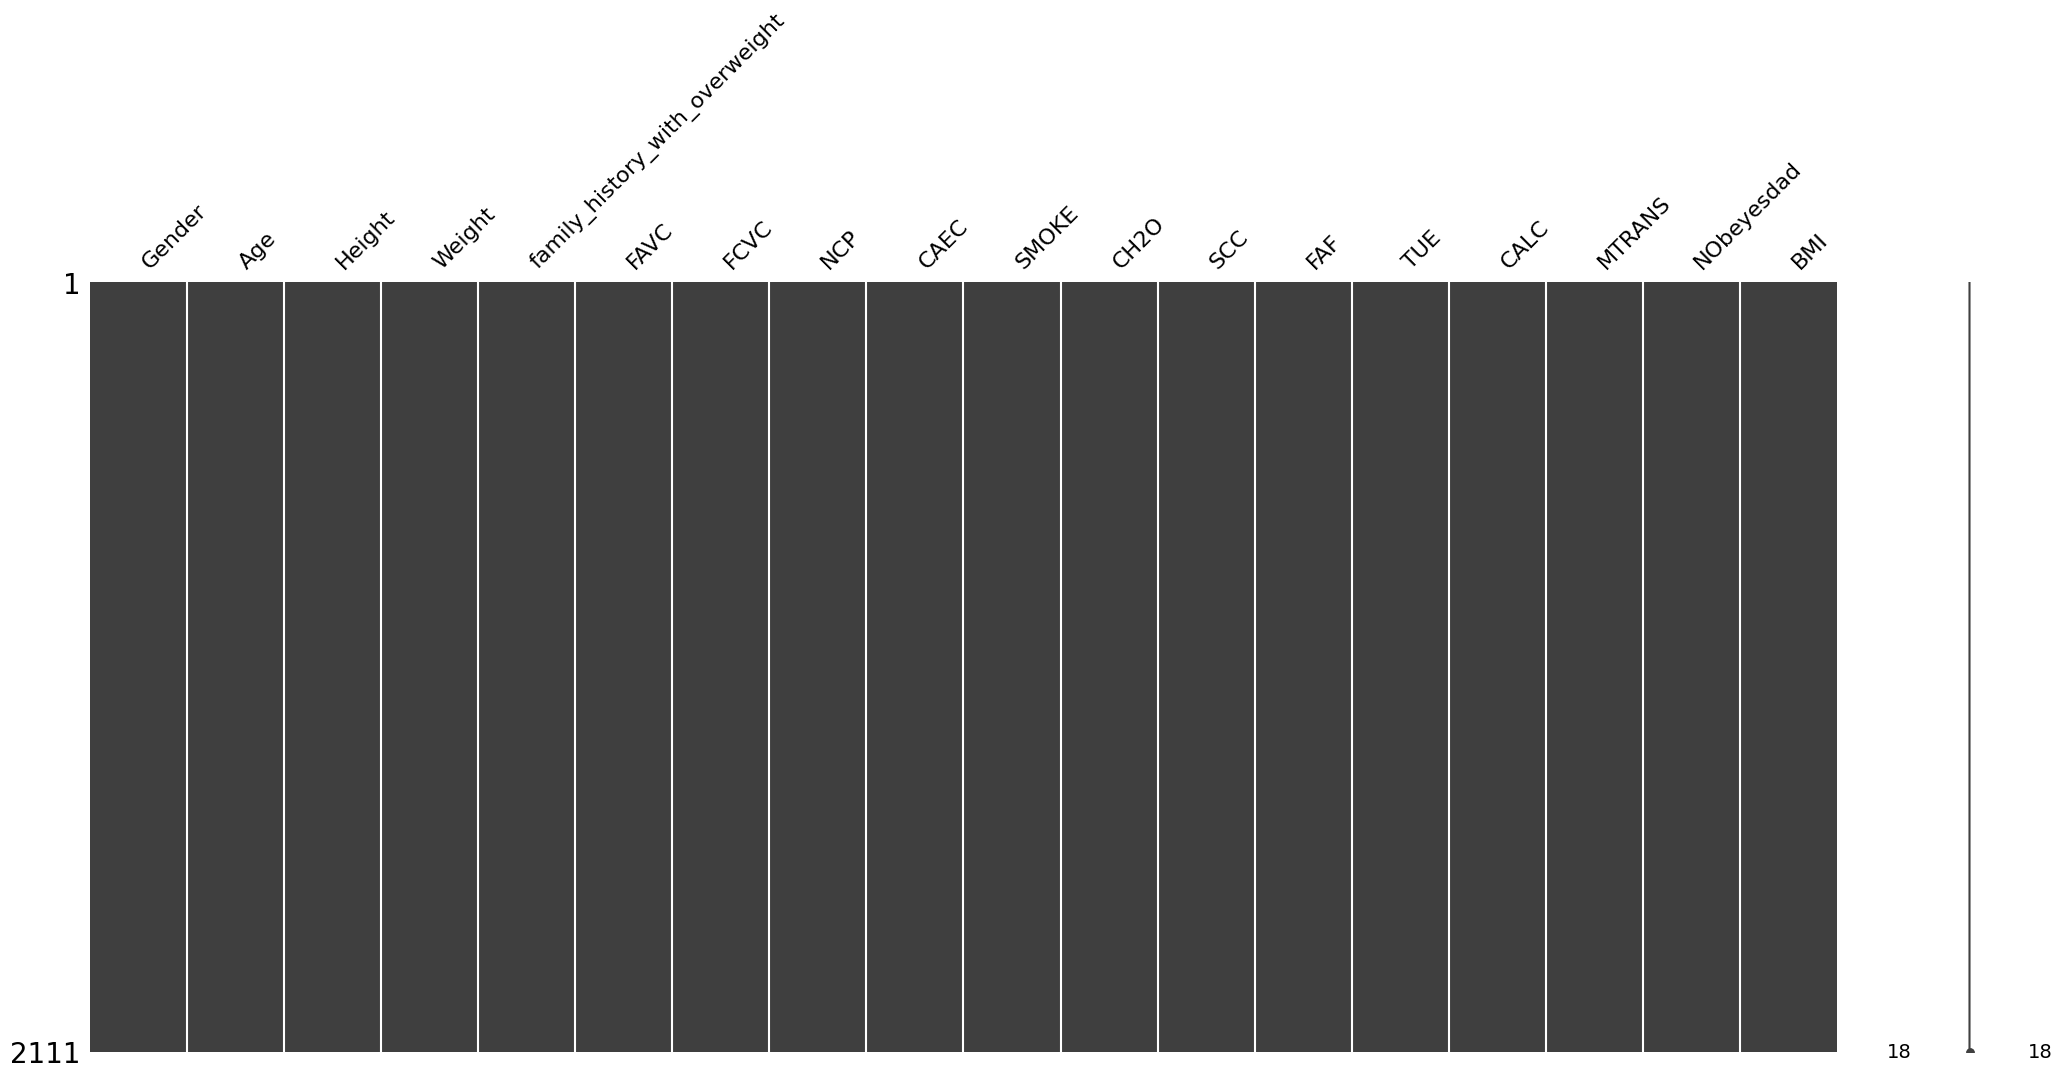

In [14]:
# Data Cleaning
# 1. Deal with Missing values
# 1.1 Ignore those tuples
# 1.2 Fill in the missing values 
obesity_df.isna().sum()
import missingno as msno
msno.matrix(obesity_df)
# 2. Deal with noisy data
# 2.1 Binning using cut and qcut
cat_columns = obesity_df.select_dtypes(['category']).columns



In [15]:
# function number_of_outliers for checking the number of outliers in the dataset
def number_of_outliers(df):
    
    df = df.select_dtypes(exclude = 'object')
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

number_of_outliers(obesity_df)

Gender                              0
Age                               160
Height                              1
Weight                              1
family_history_with_overweight    385
FAVC                              245
FCVC                                0
NCP                               579
CAEC                              346
SMOKE                              44
CH2O                                0
SCC                                96
FAF                                 0
TUE                                 0
CALC                                1
MTRANS                            531
NObeyesdad                          0
BMI                                 0
dtype: int64

In [16]:
import pandas as pd

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

In [17]:
obesity_df = remove_outliers(obesity_df, 'Height')
obesity_df = remove_outliers(obesity_df, 'Weight')

<AxesSubplot: >

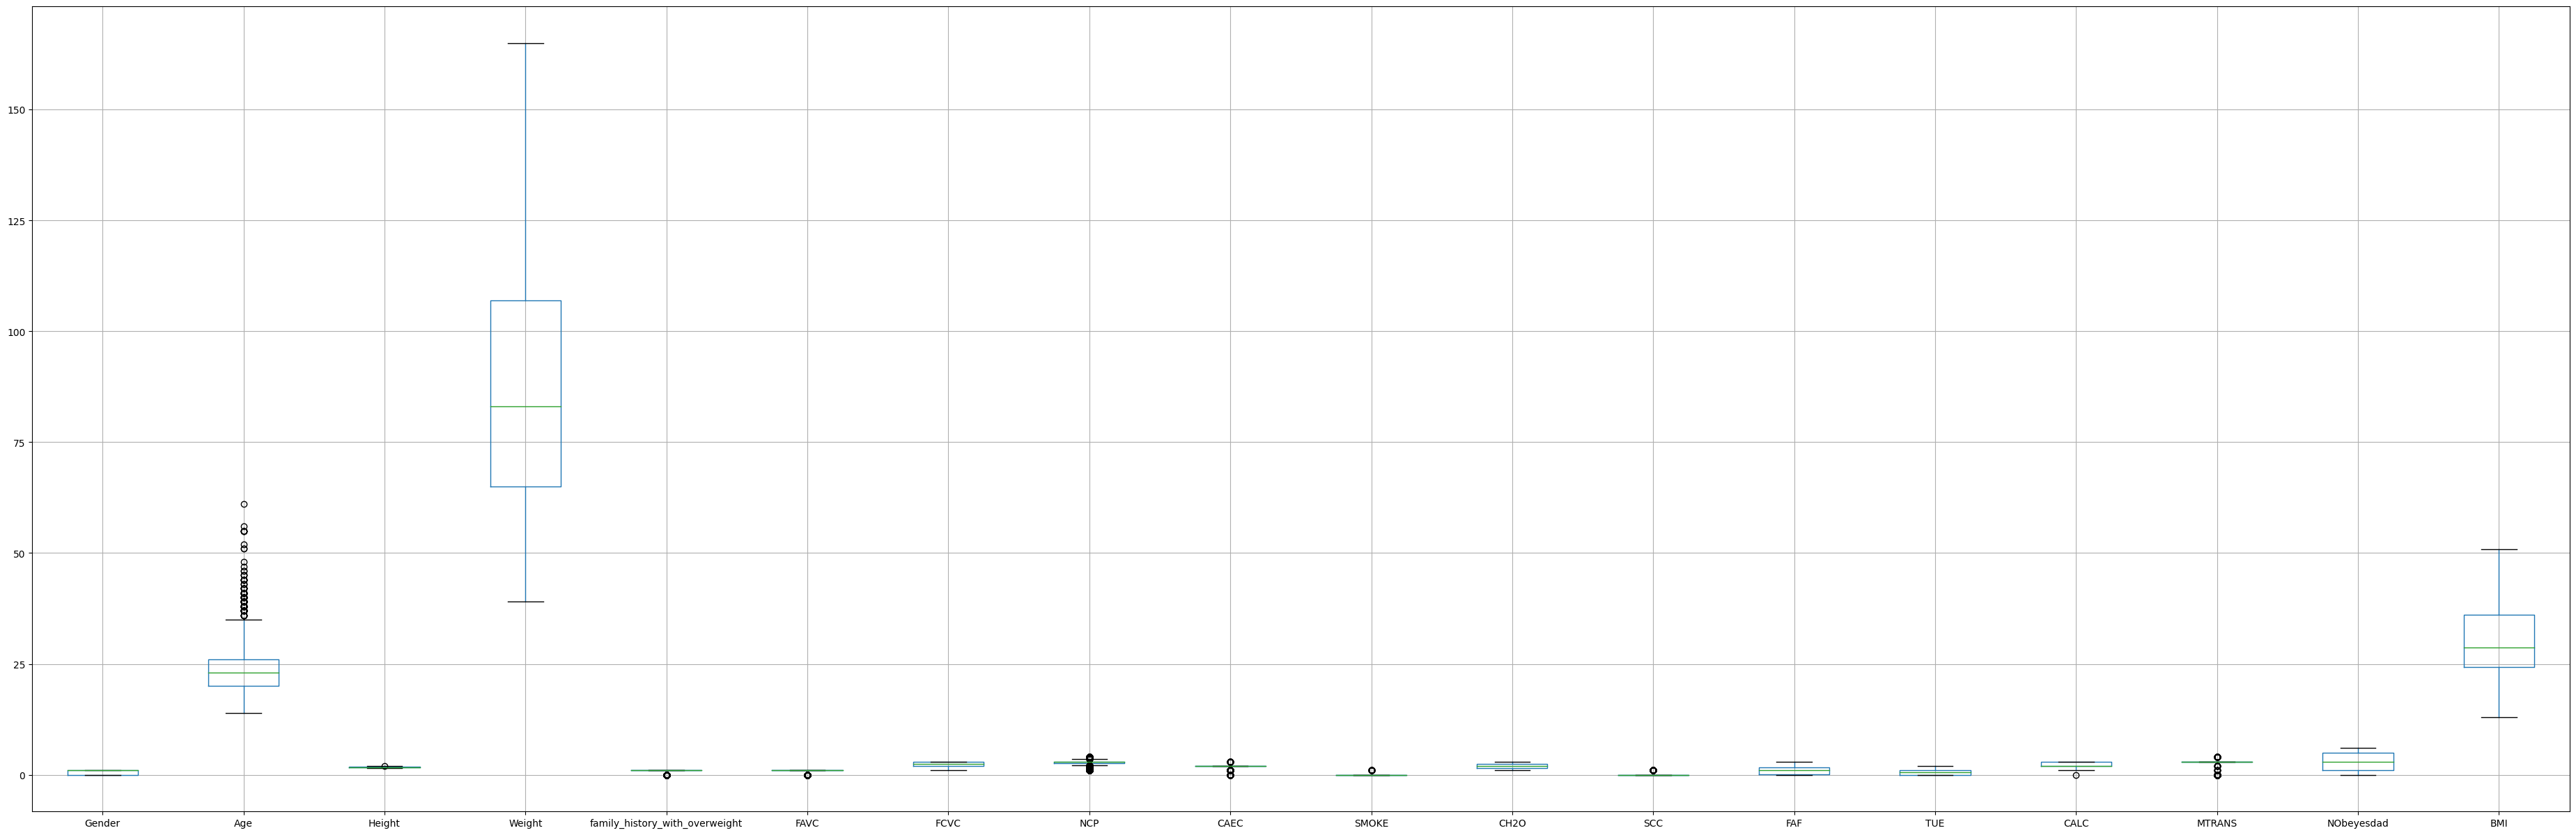

In [18]:
obesity_df.boxplot(figsize=(47,15))

In [19]:
#sns.boxplot(obesity_df["MTRANS"],obesity_df["NObeyesdad"])
#plt.show()

array([[<AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Height'}>,
        <AxesSubplot: title={'center': 'Weight'}>],
       [<AxesSubplot: title={'center': 'family_history_with_overweight'}>,
        <AxesSubplot: title={'center': 'FAVC'}>,
        <AxesSubplot: title={'center': 'FCVC'}>,
        <AxesSubplot: title={'center': 'NCP'}>],
       [<AxesSubplot: title={'center': 'CAEC'}>,
        <AxesSubplot: title={'center': 'SMOKE'}>,
        <AxesSubplot: title={'center': 'CH2O'}>,
        <AxesSubplot: title={'center': 'SCC'}>],
       [<AxesSubplot: title={'center': 'FAF'}>,
        <AxesSubplot: title={'center': 'TUE'}>,
        <AxesSubplot: title={'center': 'CALC'}>,
        <AxesSubplot: title={'center': 'MTRANS'}>],
       [<AxesSubplot: title={'center': 'NObeyesdad'}>,
        <AxesSubplot: title={'center': 'BMI'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

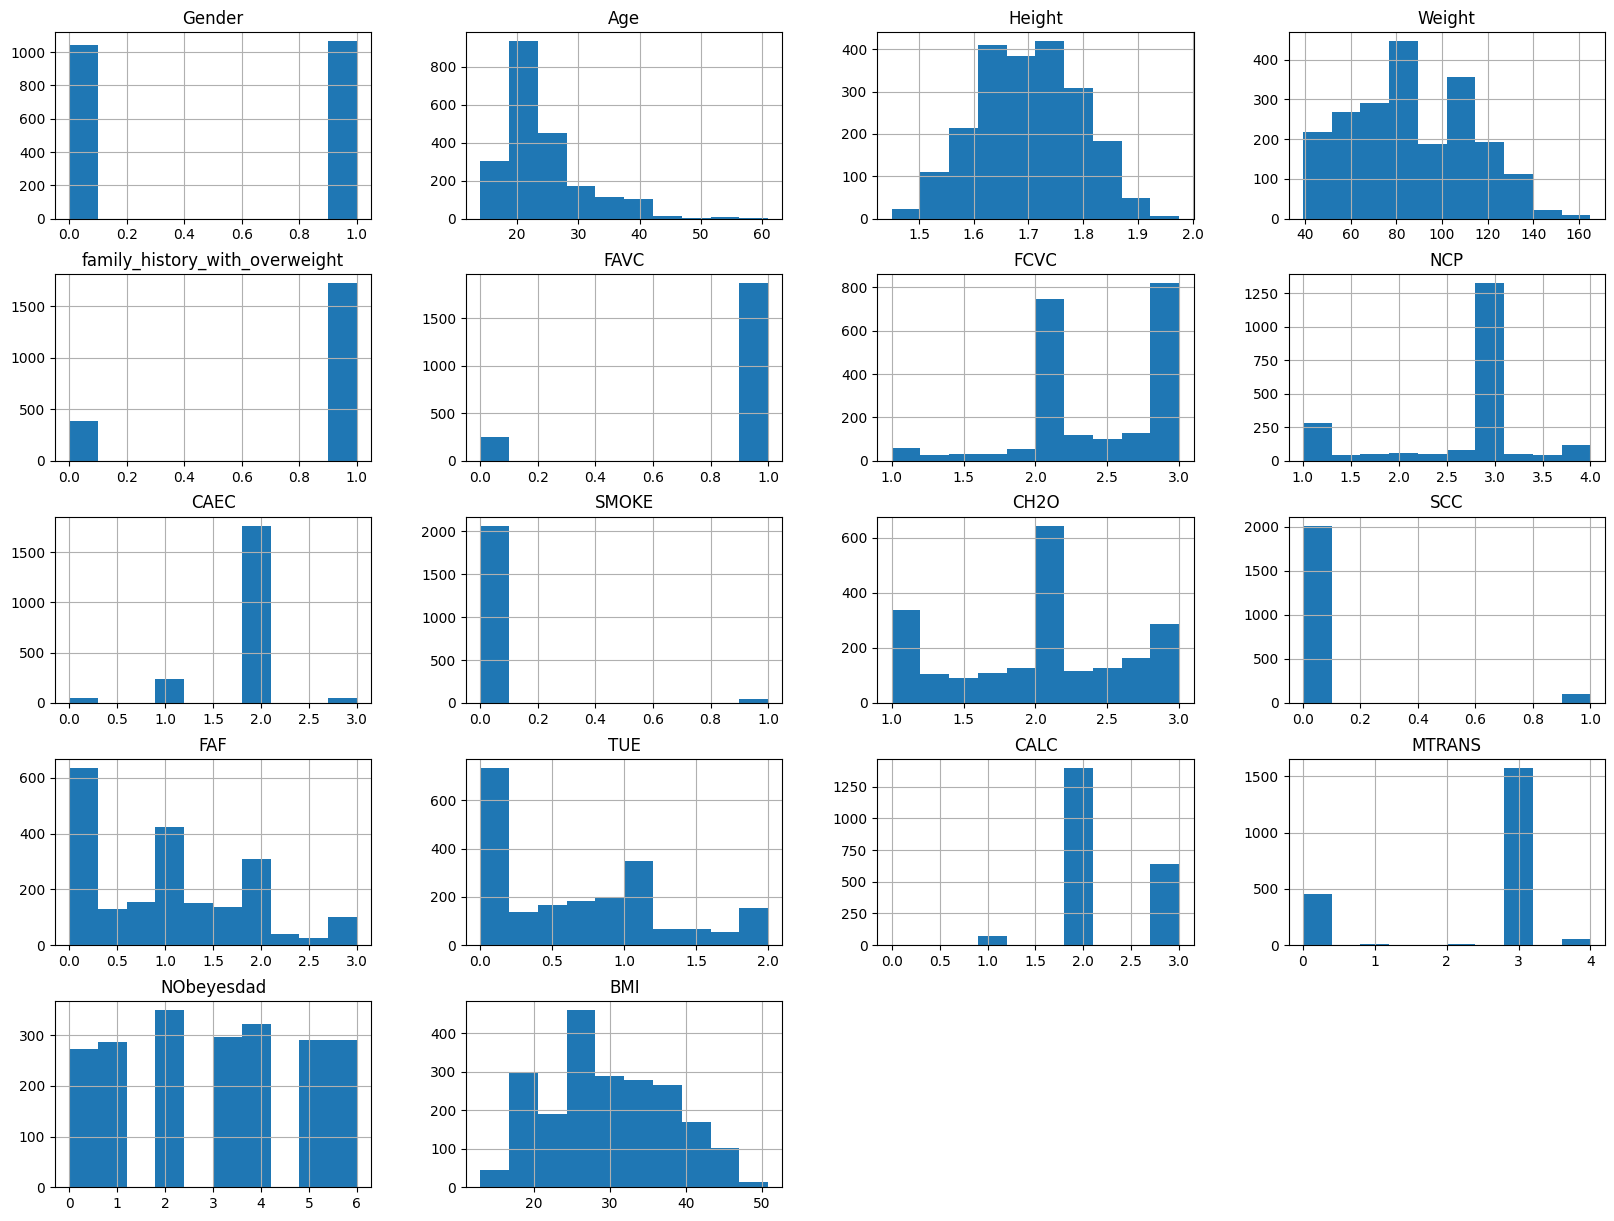

In [20]:
#(part 4) For all columns, visualize distribution of the data using histogram. 
#Comment on the data’s modality (i.e., bimodal, trimodal, etc.)
obesity_df.hist(figsize=(20,15)) 

In [21]:
obesity_df.dtypes


Gender                               int8
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight       int8
FAVC                                 int8
FCVC                              float64
NCP                               float64
CAEC                                 int8
SMOKE                                int8
CH2O                              float64
SCC                                  int8
FAF                               float64
TUE                               float64
CALC                                 int8
MTRANS                               int8
NObeyesdad                           int8
BMI                               float64
dtype: object

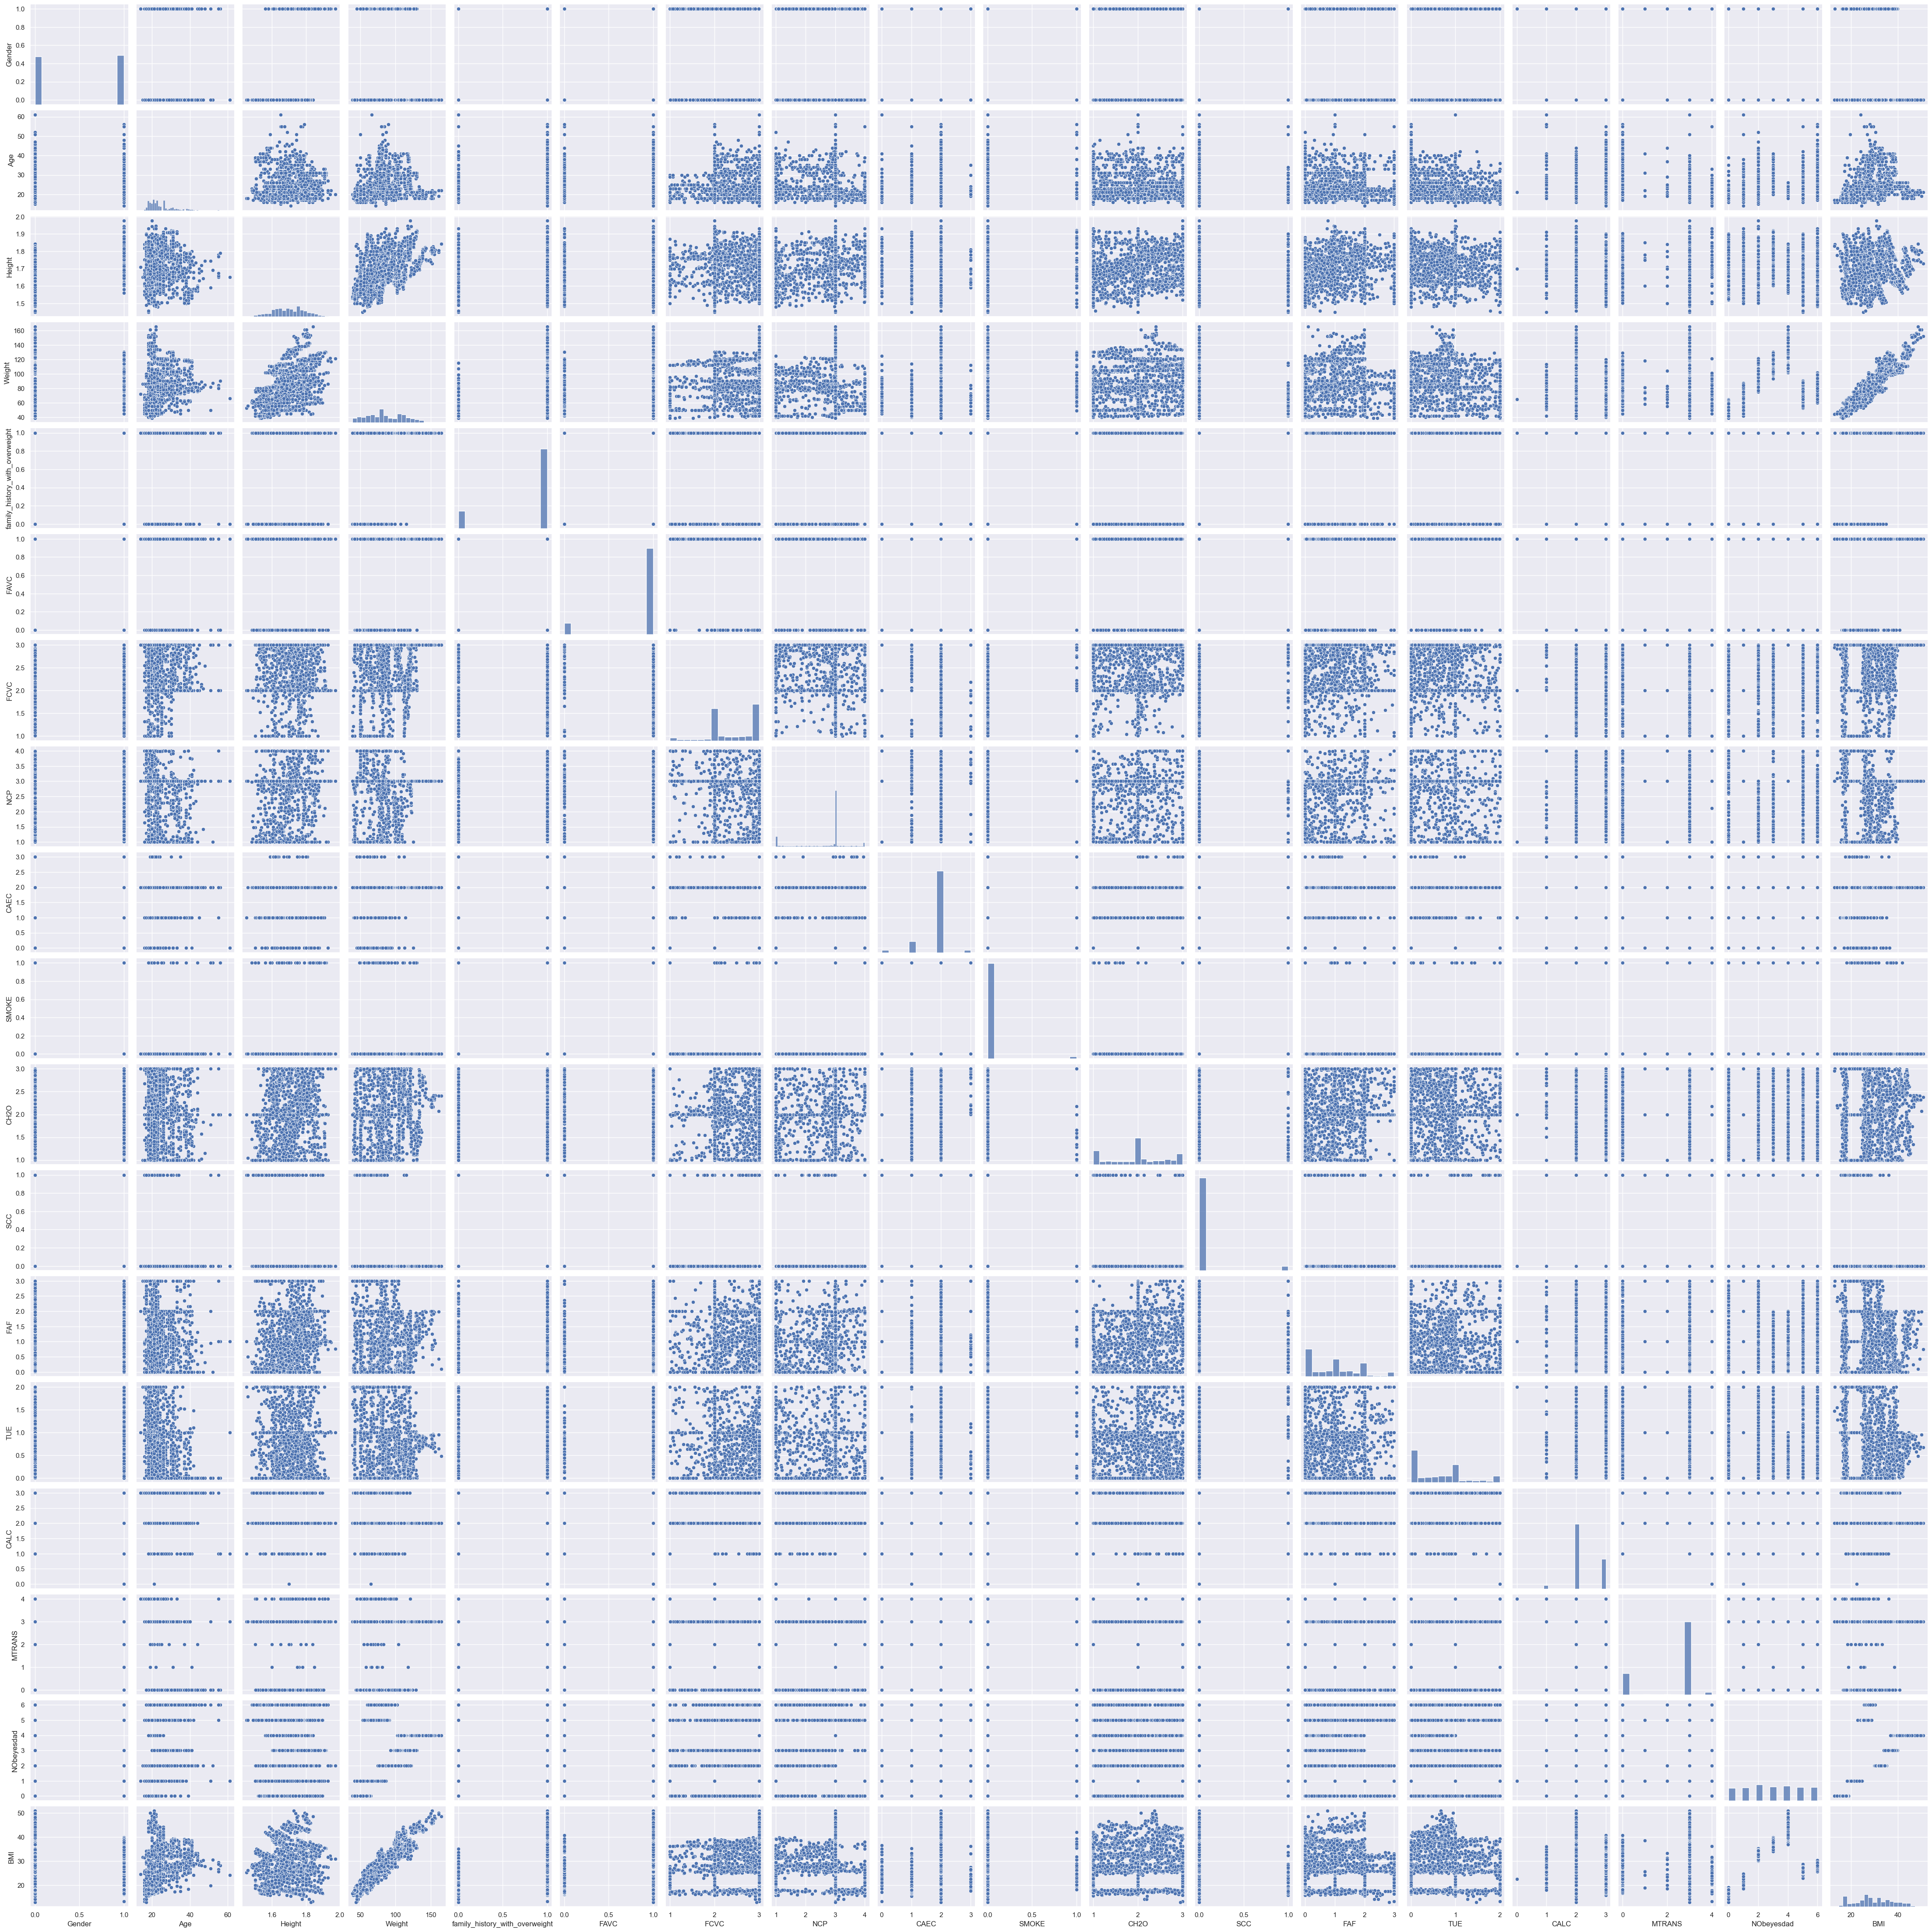

In [22]:
import seaborn as sns

sns.set()
sns.pairplot(obesity_df)

In [23]:
corr_matrix = obesity_df.corr()
corr_matrix

Gender       Age    Height    Weight  \
Gender                          1.000000  0.049506  0.618293  0.159675   
Age                             0.049506  1.000000 -0.024451  0.206189   
Height                          0.618293 -0.024451  1.000000  0.460783   
Weight                          0.159675  0.206189  0.460783  1.000000   
family_history_with_overweight  0.102128  0.205961  0.247352  0.497083   
FAVC                            0.064628  0.063705  0.178066  0.272333   
FCVC                           -0.274891  0.017157 -0.038068  0.216252   
NCP                             0.067258 -0.043639  0.243476  0.106912   
CAEC                            0.094737  0.082406  0.056421  0.295274   
SMOKE                           0.044856  0.091271  0.055993  0.026144   
CH2O                            0.107294 -0.045133  0.211840  0.199790   
SCC                            -0.102479 -0.116244 -0.133646 -0.201966   
FAF                             0.189216 -0.144699  0.294675 -0.053556   
TUE                             0.016753 -0.296302  0.050790 -0.073141   
CALC                            0.008109 -0.046013 -0.128937 -0.206372   
MTRANS                         -0.138090 -0.600446 -0.074977  0.003634   
NObeyesdad                      0.024930  0.235840  0.039409  0.388363   
BMI                            -0.054425  0.246978  0.129850  0.935085   

                                family_history_with_overweight      FAVC  \
Gender                                                0.102128  0.064628   
Age                                                   0.205961  0.063705   
Height                                                0.247352  0.178066   
Weight                                                0.497083  0.272333   
family_history_with_overweight                        1.000000  0.207908   
FAVC                                                  0.207908  1.000000   
FCVC                                                  0.040326 -0.027349   
NCP                                                   0.071202 -0.007140   
CAEC                                                  0.171885  0.151764   
SMOKE                                                 0.017453 -0.050613   
CH2O                                                  0.147184  0.009450   
SCC                                                  -0.185348 -0.190599   
FAF                                                  -0.056955 -0.108235   
TUE                                                   0.022697  0.068238   
CALC                                                  0.036918 -0.089358   
MTRANS                                               -0.101788 -0.069986   
NObeyesdad                                            0.313743  0.044593   
BMI                                                   0.483653  0.246001   

                                    FCVC       NCP      CAEC     SMOKE  \
Gender                         -0.274891  0.067258  0.094737  0.044856   
Age                             0.017157 -0.043639  0.082406  0.091271   
Height                         -0.038068  0.243476  0.056421  0.055993   
Weight                          0.216252  0.106912  0.295274  0.026144   
family_history_with_overweight  0.040326  0.071202  0.171885  0.017453   
FAVC                           -0.027349 -0.007140  0.151764 -0.050613   
FCVC                            1.000000  0.042179 -0.055476  0.014347   
NCP                             0.042179  1.000000 -0.097138  0.007868   
CAEC                           -0.055476 -0.097138  1.000000 -0.055938   
SMOKE                           0.014347  0.007868 -0.055938  1.000000   
CH2O                            0.069142  0.056820  0.148798 -0.031904   
SCC                             0.071916 -0.015542 -0.110283  0.047703   
FAF                             0.019349  0.129335 -0.029262  0.011299   
TUE                            -0.101274  0.036118 -0.047242  0.017694   
CALC                           -0.060740 -0.071562 -0.049204 -0.082555  

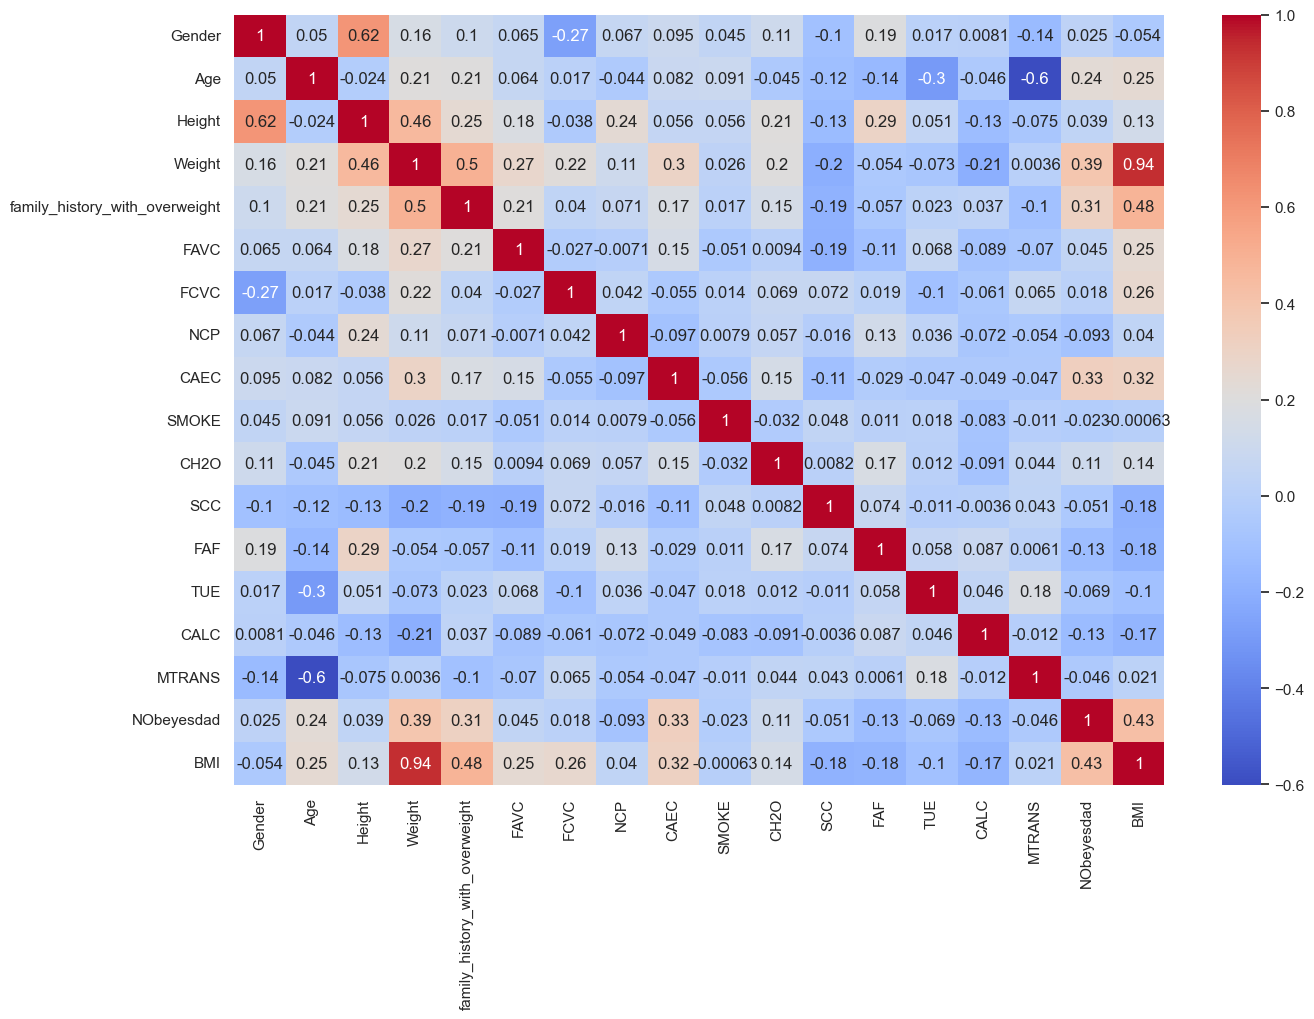

In [24]:
# Visualize the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Show the plot
plt.show()


In [25]:
from pandas import *
import numpy as np
from scipy.stats.stats import pearsonr
import itertools

correlations = {}
columns = obesity_df.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(obesity_df.loc[:, col_a], obesity_df.loc[:, col_b])

result = DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())


                                                 PCC       p-value
Age__BMI                                    0.246978  1.118187e-30
Age__CAEC                                   0.082406  1.514885e-04
Age__CALC                                  -0.046013  3.460487e-02
Age__CH2O                                  -0.045133  3.821805e-02
Age__FAF                                   -0.144699  2.449541e-11
...                                              ...           ...
family_history_with_overweight__NCP         0.071202  1.067622e-03
family_history_with_overweight__NObeyesdad  0.313743  2.143981e-49
family_history_with_overweight__SCC        -0.185348  9.381451e-18
family_history_with_overweight__SMOKE       0.017453  4.230803e-01
family_history_with_overweight__TUE         0.022697  2.974730e-01

[153 rows x 2 columns]


/var/folders/rx/2m_79x6s3sg6dvp31rmh_hlh0000gn/T/ipykernel_3899/1388259067.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


## Project part 4: Clustering and Classification

### Clustering using:
1. Agglomerative 
2. k-means
3. mini-batch k-means
4. mean-shift clustering
- Compare the results and select the most suitable clustering method for your dataset.

In [26]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X = obesity_df[['Gender', 'Age', 'Height', 'family_history_with_overweight','FAVC','FCVC', 'NCP', 'CAEC', 'SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','Weight']]

# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

InvalidIndexError: ((array([   0,    1,    2, ..., 1502, 1507, 1508]),), 0)

CLASSIFICATION

# SUPPORT VECTOR MACHINE

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [28]:
obesity_df.head()

Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62      64                               1     0   2.0   
1       0   21    1.52      56                               1     0   3.0   
2       1   23    1.80      77                               1     0   2.0   
3       1   27    1.80      87                               0     0   3.0   
4       1   22    1.78      90                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad        BMI  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  24.386526  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  24.238227  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  23.765432  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  26.851852  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  28.342381

In [29]:
X = obesity_df.drop(['NObeyesdad'], axis=1)
y = obesity_df['NObeyesdad']

In [30]:
# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [33]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7606635071090048


In [34]:
predictions = svm.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(confusion_matrix(y_test,predictions))

[[52  1  0  0  0  0  0]
 [22 20  0  0  0 17  2]
 [ 0  0 50  6  0  0  7]
 [ 0  0  3 49  4  0  0]
 [ 0  0  0  5 69  0  0]
 [ 0  5  0  0  0 40 11]
 [ 0  1  7  0  0 10 41]]


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82        53
           1       0.74      0.33      0.45        61
           2       0.83      0.79      0.81        63
           3       0.82      0.88      0.84        56
           4       0.95      0.93      0.94        74
           5       0.60      0.71      0.65        56
           6       0.67      0.69      0.68        59

    accuracy                           0.76       422
   macro avg       0.76      0.76      0.74       422
weighted avg       0.77      0.76      0.75       422



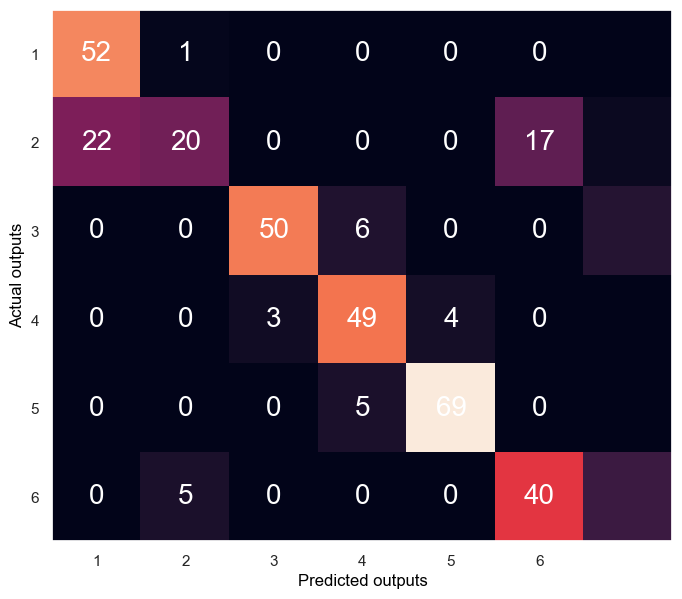

In [38]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.set_ylim(5.5, -0.5)
for i in range(6):
    for j in range(6):
        ax.text(j, i, confusion[i, j], ha='center', va='center', color='white', fontsize=20)
plt.show()


# NAIVE BAYES

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [40]:
X = obesity_df.drop(['NObeyesdad'], axis=1)
y = obesity_df['NObeyesdad']

In [41]:
# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
nb_model = GaussianNB()

In [44]:
#Fit the model to the training data
nb_model.fit(X_train, y_train)


GaussianNB()

In [45]:
y_pred = nb_model.predict(X_test)

In [46]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8672985781990521


In [47]:
predictions = nb_model.predict(X_test)

In [48]:
print(confusion_matrix(y_test,predictions))

[[53  0  0  0  0  0  0]
 [14 40  0  0  0  7  0]
 [ 0  0 48  9  1  0  5]
 [ 0  0  1 55  0  0  0]
 [ 0  0  0  0 74  0  0]
 [ 0  5  0  0  0 43  8]
 [ 0  2  3  0  0  1 53]]


In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        53
           1       0.85      0.66      0.74        61
           2       0.92      0.76      0.83        63
           3       0.86      0.98      0.92        56
           4       0.99      1.00      0.99        74
           5       0.84      0.77      0.80        56
           6       0.80      0.90      0.85        59

    accuracy                           0.87       422
   macro avg       0.87      0.87      0.86       422
weighted avg       0.87      0.87      0.86       422



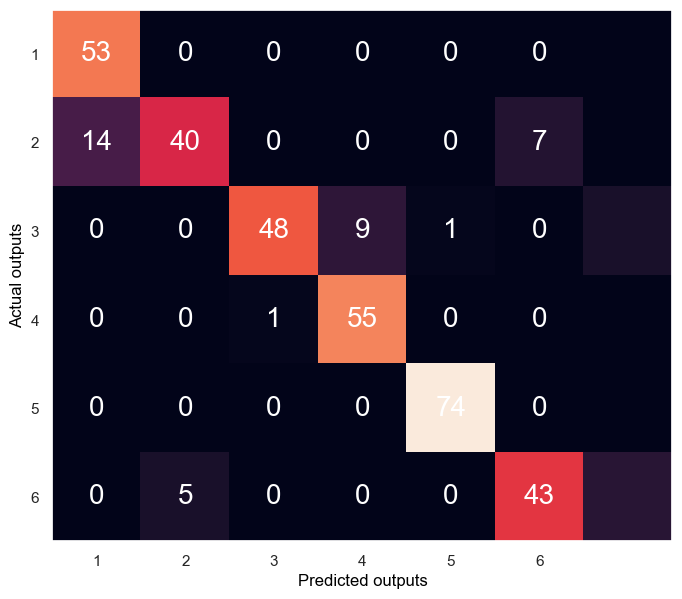

In [50]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.set_ylim(5.5, -0.5)
for i in range(6):
    for j in range(6):
        ax.text(j, i, confusion[i, j], ha='center', va='center', color='white', fontsize=20)
plt.show()


# DECISION TREE

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [52]:
X = obesity_df.drop(['NObeyesdad'], axis=1)
y = obesity_df['NObeyesdad']

In [53]:
# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtree = DecisionTreeClassifier()

In [57]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
# Predict the target variable for the test data
y_pred = dtree.predict(X_test)


In [59]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9786729857819905


In [60]:
predictions = dtree.predict(X_test)

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.98      0.95      0.97        61
           2       0.97      0.98      0.98        63
           3       0.98      0.96      0.97        56
           4       1.00      1.00      1.00        74
           5       0.98      0.95      0.96        56
           6       0.97      1.00      0.98        59

    accuracy                           0.98       422
   macro avg       0.98      0.98      0.98       422
weighted avg       0.98      0.98      0.98       422



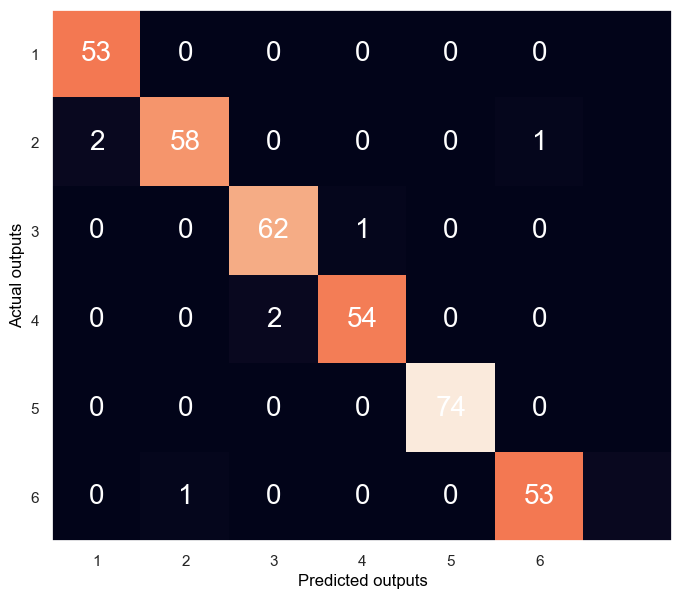

In [62]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.set_ylim(5.5, -0.5)
for i in range(6):
    for j in range(6):
        ax.text(j, i, confusion[i, j], ha='center', va='center', color='white', fontsize=20)
plt.show()


In [144]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

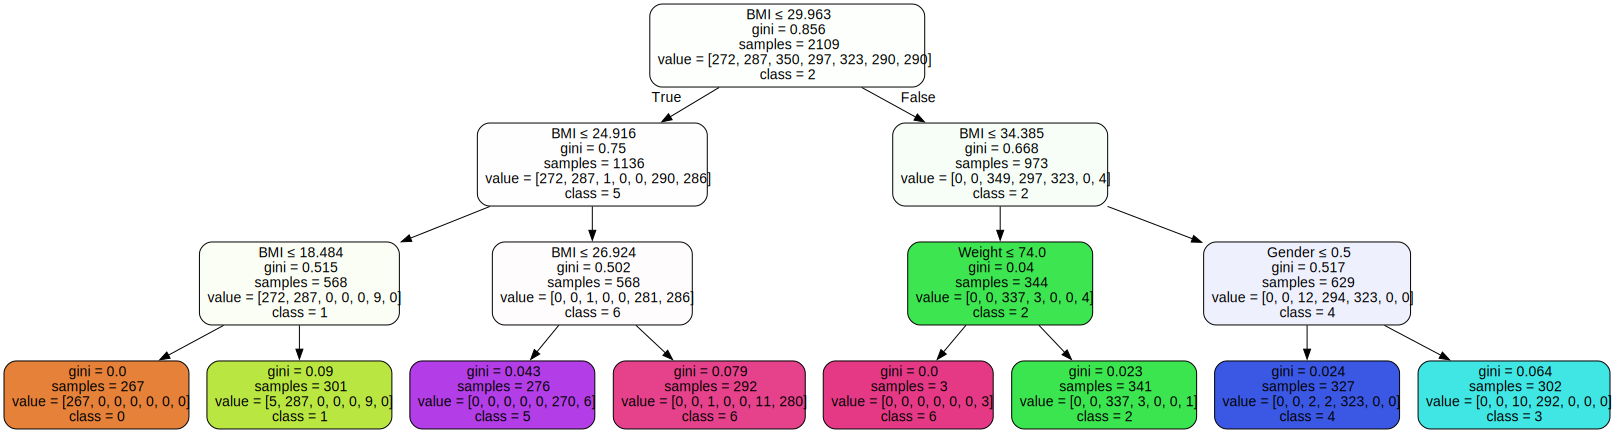

In [151]:
# Define the feature and target columns
X = obesity_df.drop(columns=['NObeyesdad'])
y = obesity_df['NObeyesdad']
X=X.astype(str)
y=y.astype(str)

# Train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X, y)

# Export the decision tree in GraphViz format
dot_data = export_graphviz(dt_model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=dt_model.classes_,  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Save the decision tree visualization to a file
graph.render('obesity_decision_tree', format='png', cleanup=True)
graph

# RANDOM FOREST

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [66]:
X = obesity_df.drop(['NObeyesdad'], axis=1)
y = obesity_df['NObeyesdad']

In [67]:
# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,  max_depth=3, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [70]:
y_pred = rfc.predict(X_test)

In [71]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8815165876777251


In [72]:
predictions = rfc.predict(X_test)

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        53
           1       0.85      0.56      0.67        61
           2       0.98      0.97      0.98        63
           3       0.97      1.00      0.98        56
           4       1.00      1.00      1.00        74
           5       0.74      0.77      0.75        56
           6       0.83      0.88      0.85        59

    accuracy                           0.88       422
   macro avg       0.88      0.88      0.87       422
weighted avg       0.88      0.88      0.88       422



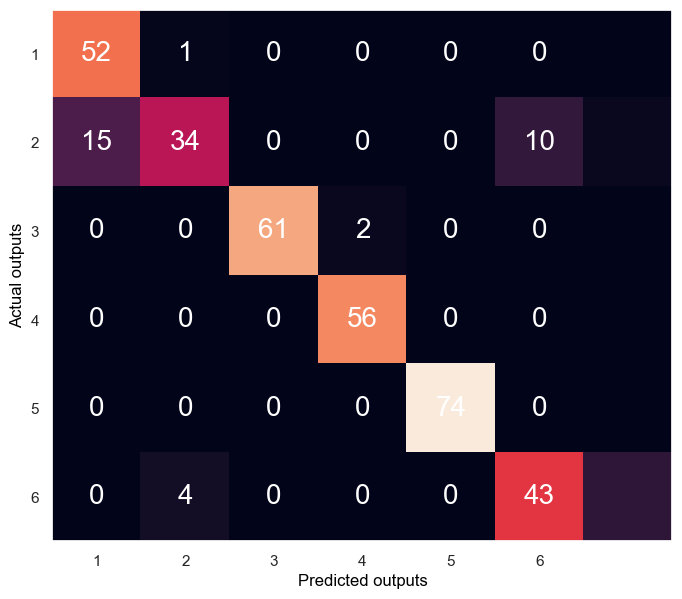

In [74]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.set_ylim(5.5, -0.5)
for i in range(6):
    for j in range(6):
        ax.text(j, i, confusion[i, j], ha='center', va='center', color='white', fontsize=20)
plt.show()


# LOGISTIC REGRESSION

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [76]:
X = obesity_df.drop(['NObeyesdad'], axis=1)
y = obesity_df['NObeyesdad']

In [77]:
# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)

In [80]:
lr_model.fit(X_train, y_train)


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [81]:
y_pred = lr_model.predict(X_test)

In [82]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8151658767772512


In [83]:
predictions = lr_model.predict(X_test)

In [84]:
print(confusion_matrix(y_test,predictions))

[[51  2  0  0  0  0  0]
 [ 8 36  0  0  0 14  3]
 [ 0  0 48  7  3  0  5]
 [ 0  0  5 51  0  0  0]
 [ 0  0  0  0 74  0  0]
 [ 0  2  3  0  0 42  9]
 [ 0  0  4  0  1 12 42]]


In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        53
           1       0.90      0.59      0.71        61
           2       0.80      0.76      0.78        63
           3       0.88      0.91      0.89        56
           4       0.95      1.00      0.97        74
           5       0.62      0.75      0.68        56
           6       0.71      0.71      0.71        59

    accuracy                           0.82       422
   macro avg       0.82      0.81      0.81       422
weighted avg       0.82      0.82      0.81       422



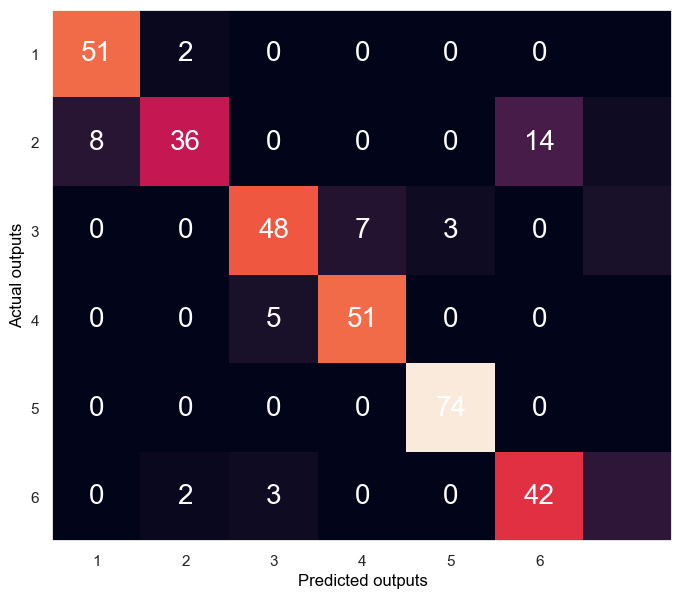

In [86]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.set_ylim(5.5, -0.5)
for i in range(6):
    for j in range(6):
        ax.text(j, i, confusion[i, j], ha='center', va='center', color='white', fontsize=20)
plt.show()


# K NEAREST NEIGHBORS

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [88]:
X = obesity_df.drop(['NObeyesdad'], axis=1)
y = obesity_df['NObeyesdad']

In [89]:
# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)


In [92]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
y_pred =knn.predict(X_test)


In [94]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9312796208530806


In [95]:
knn = KNeighborsClassifier(n_neighbors=10)


In [96]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [97]:
y_pred =knn.predict(X_test)


In [98]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.919431279620853


In [99]:
knn = KNeighborsClassifier(n_neighbors=15)


In [100]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [101]:
y_pred =knn.predict(X_test)


In [102]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9052132701421801


In [103]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

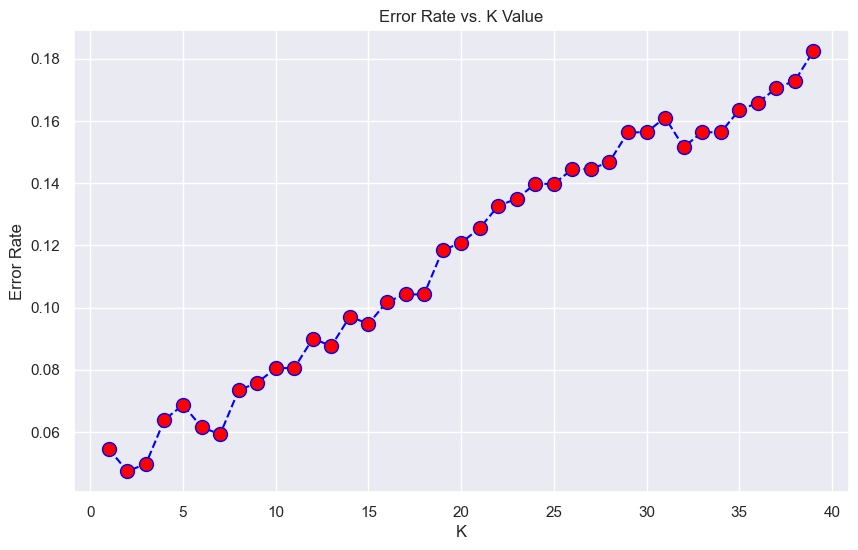

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [109]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)

print('WITH K=1')
print('\n')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=1


Accuracy: 0.919431279620853


[[51  2  0  0  0  0  0]
 [ 8 36  0  0  0 14  3]
 [ 0  0 48  7  3  0  5]
 [ 0  0  5 51  0  0  0]
 [ 0  0  0  0 74  0  0]
 [ 0  2  3  0  0 42  9]
 [ 0  0  4  0  1 12 42]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.91        53
           1       0.90      0.59      0.71        61
           2       0.80      0.76      0.78        63
           3       0.88      0.91      0.89        56
           4       0.95      1.00      0.97        74
           5       0.62      0.75      0.68        56
           6       0.71      0.71      0.71        59

    accuracy                           0.82       422
   macro avg       0.82      0.81      0.81       422
weighted avg       0.82      0.82      0.81       422



In [110]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)

print('WITH K=20')
print('\n')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=20


Accuracy: 0.8791469194312796


[[51  2  0  0  0  0  0]
 [ 8 36  0  0  0 14  3]
 [ 0  0 48  7  3  0  5]
 [ 0  0  5 51  0  0  0]
 [ 0  0  0  0 74  0  0]
 [ 0  2  3  0  0 42  9]
 [ 0  0  4  0  1 12 42]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.91        53
           1       0.90      0.59      0.71        61
           2       0.80      0.76      0.78        63
           3       0.88      0.91      0.89        56
           4       0.95      1.00      0.97        74
           5       0.62      0.75      0.68        56
           6       0.71      0.71      0.71        59

    accuracy                           0.82       422
   macro avg       0.82      0.81      0.81       422
weighted avg       0.82      0.82      0.81       422



In [111]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=40
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)

print('WITH K=20')
print('\n')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=20


Accuracy: 0.8151658767772512


[[51  2  0  0  0  0  0]
 [ 8 36  0  0  0 14  3]
 [ 0  0 48  7  3  0  5]
 [ 0  0  5 51  0  0  0]
 [ 0  0  0  0 74  0  0]
 [ 0  2  3  0  0 42  9]
 [ 0  0  4  0  1 12 42]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.91        53
           1       0.90      0.59      0.71        61
           2       0.80      0.76      0.78        63
           3       0.88      0.91      0.89        56
           4       0.95      1.00      0.97        74
           5       0.62      0.75      0.68        56
           6       0.71      0.71      0.71        59

    accuracy                           0.82       422
   macro avg       0.82      0.81      0.81       422
weighted avg       0.82      0.82      0.81       422



# MLP NEURAL NETWORK

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [113]:
X = obesity_df.drop(['NObeyesdad'], axis=1)
y = obesity_df['NObeyesdad']

In [114]:
# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)


In [117]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [118]:
y_pred =mlp.predict(X_test)


In [119]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9146919431279621


In [120]:
predictions = mlp.predict(X_test)

In [121]:
print(confusion_matrix(y_test,predictions))

[[53  0  0  0  0  0  0]
 [ 4 45  0  0  0 12  0]
 [ 0  0 60  1  1  0  1]
 [ 0  0  0 56  0  0  0]
 [ 0  0  0  0 74  0  0]
 [ 0  1  0  0  0 50  5]
 [ 0  0  1  0  0 10 48]]


In [122]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        53
           1       0.98      0.74      0.84        61
           2       0.98      0.95      0.97        63
           3       0.98      1.00      0.99        56
           4       0.99      1.00      0.99        74
           5       0.69      0.89      0.78        56
           6       0.89      0.81      0.85        59

    accuracy                           0.91       422
   macro avg       0.92      0.91      0.91       422
weighted avg       0.92      0.91      0.92       422



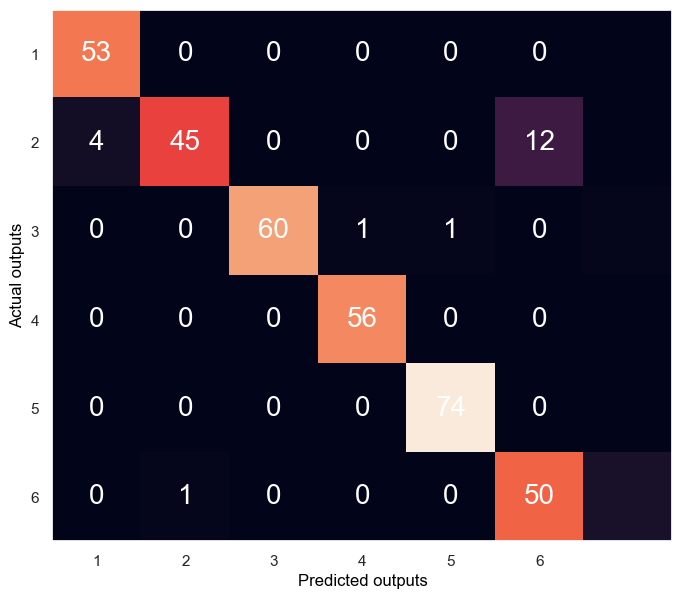

In [123]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5), ticklabels=('1', '2', '3', '4', '5', '6'))
ax.set_ylim(5.5, -0.5)
for i in range(6):
    for j in range(6):
        ax.text(j, i, confusion[i, j], ha='center', va='center', color='white', fontsize=20)
plt.show()


ACCURACY CHART 

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



In [125]:
X = obesity_df.drop(['NObeyesdad'], axis=1)
y = obesity_df['NObeyesdad']
# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))

In [128]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

In [129]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dtree.predict(X_test))

In [130]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rfc.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rfc.predict(X_test))

In [131]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))

In [133]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
mlp_accuracy = accuracy_score(y_test, mlp.predict(X_test))

In [142]:
models = ['SVM', 'NB', 'DT', 'RF', 'LR', 'KNN', 'MLP NN']
accuracies = [svm_accuracy, nb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, knn_accuracy, mlp_accuracy]

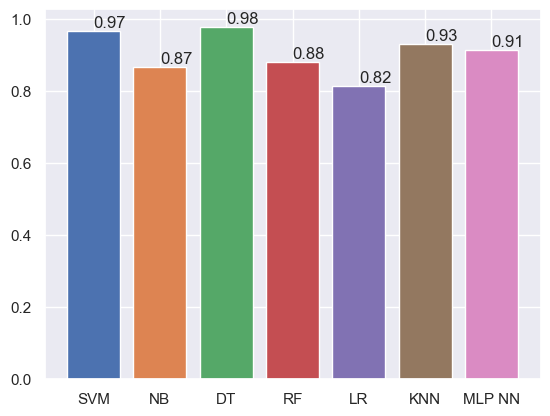

In [143]:
for i in range(len(models)):
    plt.bar(models[i], accuracies[i])
    plt.text(models[i], accuracies[i] + 0.01, str(round(accuracies[i], 2)))
    

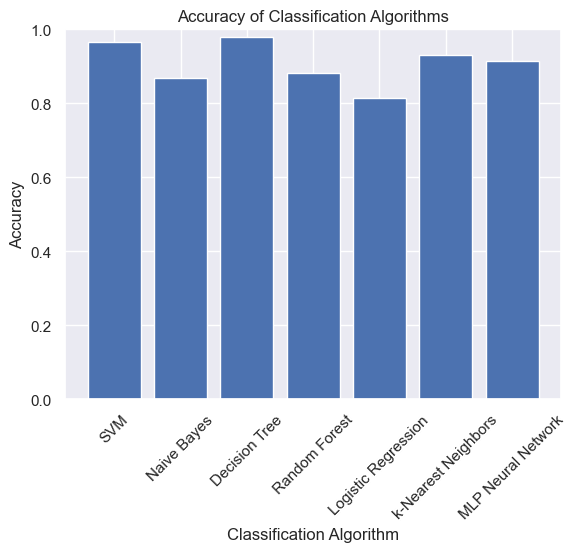

In [136]:
plt.bar(models, accuracies)
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.title('Accuracy of Classification Algorithms')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.show()

The Estimation of obesity levels based on eating habits and physical condition Data Set was subjected to classification using seven different algorithms - SVM, Naive Bayes, Decision tree, Random Forest, Logistic Regression, KNN, and MLP neural network - to determine the best algorithm for classifying the data. The accuracy rates of the algorithms were as follows: 0.97, 0.87, 0.98, 0.88, 0.82, 0.93, and 0.91, respectively.

The results show that decision tree and random forest algorithms outperformed the other algorithms, achieving accuracy rates of 0.98 and 0.88, respectively. Decision tree algorithms recursively split the dataset into smaller subsets based on the most significant attributes, resulting in a tree structure that represents the classification rules. Random forest algorithm, on the other hand, is an ensemble of decision trees, which aggregates the results of multiple decision trees to improve accuracy and reduce overfitting.

SVM algorithm achieved the second-highest accuracy of 0.97. SVM is a powerful algorithm for classification tasks that works by finding the optimal hyperplane that separates the classes in the input data.

Naive Bayes, KNN, and MLP neural network achieved relatively lower accuracy rates of 0.87, 0.93, and 0.91, respectively. Naive Bayes is a probabilistic algorithm that assumes independence between the input features, which may not hold in complex datasets. KNN works by finding the k-nearest neighbors to the input data point and classifying based on the majority class. It may not perform well in high-dimensional datasets or datasets with imbalanced classes. MLP neural network is a powerful algorithm that can learn complex non-linear relationships in the input data. However, it requires a large amount of data and may suffer from overfitting.

In summary, the decision tree and random forest algorithms were the most accurate for the Estimation of obesity levels based on eating habits and physical condition Data Set. The decision tree algorithm was able to achieve high accuracy by recursively splitting the dataset based on the most significant attributes, while the random forest algorithm aggregated the results of multiple decision trees to improve accuracy and reduce overfitting. SVM algorithm was also highly accurate in classifying the data. However, the other algorithms, including Naive Bayes, KNN, and MLP neural network, may not be as effective in this dataset due to their assumptions, limitations, or requirement